# Vorhersage und maschinelles Lernen

#### Disclaimer: Erster Versuch mit schwieriger Datengrundlage

## Vorbereitung

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv("MdB_Indexed.csv")
df = df.set_index("WP-JAHRE")
df.head()

,NUMIND,ID,ANFANG,VORNAME,NACHNAME,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,AUSLAND,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1949-1953;01,0,11000009,1949,Konrad,Adenauer,73,1,Union,Bundeskanzler a. D.,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1,11000013,1949,Willi,Agatz,45,1,Andere,"Bergmann, Gewerkschaftsfunktionär",0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,2,11000015,1949,Adolf,Ahrens,70,1,Andere,Kapitän a. D.,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,3,11000020,1949,Johannes,Albers,59,1,Union,Geschäftsführer,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,4,11000021,1949,Luise,Albertz,48,0,SPD,Buchhalterin,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
IDs = df[["ANFANG","ID", "VORNAME", "NACHNAME"]].copy()
df = df.drop(["ID", "NUMIND", "BERUF", "VORNAME", "NACHNAME"], axis = 1)

#für etwaige Visualisierungen von Zeitreihen
timeline= df["ANFANG"].unique()
print(timeline)

df.head()

[1949 1953 1957 1961 1965 1969 1972 1976 1980 1983 1987 1990 1994 1998
 2002 2005 2009 2013 2017]


,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1949-1953;01,1949,73,1,Union,0,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,45,1,Andere,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,70,1,Andere,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,59,1,Union,0,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,48,0,SPD,0,0.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
uniq = list(df.index.unique())

#Einzelne DFs
df_WP01 = df.loc[uniq[0]]
df_WP02 = df.loc[uniq[1]]
df_WP03 = df.loc[uniq[2]]
df_WP04 = df.loc[uniq[3]]
df_WP05 = df.loc[uniq[4]]
df_WP06 = df.loc[uniq[5]]
df_WP07 = df.loc[uniq[6]]
df_WP08 = df.loc[uniq[7]]
df_WP09 = df.loc[uniq[8]]
df_WP10 = df.loc[uniq[9]]
df_WP11 = df.loc[uniq[10]]
df_WP12 = df.loc[uniq[11]]
df_WP13 = df.loc[uniq[12]]
df_WP14 = df.loc[uniq[13]]
df_WP15 = df.loc[uniq[14]]
df_WP16 = df.loc[uniq[15]]
df_WP17 = df.loc[uniq[16]]
df_WP18 = df.loc[uniq[17]]
df_WP19 = df.loc[uniq[18]]


df_wp_list = [df_WP01, df_WP02, df_WP03, df_WP04, df_WP05, df_WP06, df_WP07, df_WP08, df_WP09, df_WP10, df_WP11, df_WP12, df_WP13,
df_WP14,df_WP15,df_WP16,df_WP17,df_WP18, df_WP19]


#Test
df_wp_list[4].head()

,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1965–1969;05,1965,35,1,Union,0,1.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1965–1969;05,1965,56,1,FDP,0,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,46,1,SPD,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,89,1,Union,0,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,45,1,Union,0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Beseitigung von spalten mit überflüssiger Information

In [39]:
# Bspw. Alle Wahlperioden nach der Folgenden(Target), da diese höchst wahrscheinlich nicht relevant sind

# Vorbereitung:
wp_list = np.array(["WP1","WP2","WP3","WP4","WP5","WP6","WP7","WP8","WP9","WP10","WP11","WP12","WP13","WP14","WP15","WP16","WP17","WP18","WP19"])	
# Funktion
def del_redun(dafr):
    num = int(dafr.index[0][-2:])
    ind = np.array(range(0,19))
    sel = list(ind[ind>num])
    sel.append(ind[num-1])
    drop_cols = list(wp_list[sel])
    return drop_cols

# Anwendung
for d in list(range(0,19)):
    drop = list(del_redun(df_wp_list[d]))
    df_wp_list[d] = df_wp_list[d].drop(drop, axis = 1)

    
# Test an einem Beispiel (Bundestag Nr.4)
df_wp_list[3].head()

,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP5
WP-JAHRE,,,,,,,,,,
1961–1965;04,1961,52,1,FDP,0,0.0,0,0,1,1
1961–1965;04,1961,48,0,Union,1,0.0,0,1,1,0
1961–1965;04,1961,85,1,Union,0,1.0,1,1,1,1
1961–1965;04,1961,41,1,Union,0,1.0,0,0,0,1
1961–1965;04,1961,37,1,Union,0,1.0,0,0,1,1


### Gnerierung einer Spalte für das Maß an Erfahrung eines MdBs

In [40]:
for d in list(range(0,19)):
    col_list = list(df_wp_list[d].columns.values)
    del col_list[0:6]
    col_list.pop()
    df_wp_list[d]["ERFAHRUNG"] = df_wp_list[d].loc[:,col_list].sum(axis=1)
    df_wp_list[d] = df_wp_list[d].drop(col_list, axis = 1)

In [41]:
# Korrektur
df_wp_list[18]["ERFAHRUNG"] = df_wp_list[18]["ERFAHRUNG"] + df_wp_list[18]["WP18"]
df_wp_list[18] = df_wp_list[18].drop("WP18", axis = 1)

In [42]:
df_wp_list[13].head()

,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP15,ERFAHRUNG
WP-JAHRE,,,,,,,,
1998–2002;14,1998,48,1,Union,0,1.0,1,2
1998–2002;14,1998,54,0,SPD,0,0.0,0,3
1998–2002;14,1998,55,0,FDP,0,0.0,0,2
1998–2002;14,1998,47,1,SPD,0,1.0,1,3
1998–2002;14,1998,57,1,Union,0,0.0,1,5


### Z-Transformation des Alters

In [43]:
for d in list(range(0,19)):
     df_wp_list[d]["ALTER"] = (df_wp_list[d]["ALTER"] -  df_wp_list[d]["ALTER"].mean())/df_wp_list[d]["ALTER"].std()

### Transformieren der Spalte für Parteikürzel in einzelne, binäre Spalten

In [44]:
# Funktion
def binary_transformer(dafr):
    uni_lst = ['Union', 'SPD', 'FDP', 'Bündnis 90/Die Grünen', 'Die Linke', 'Andere', 'AfD']
    for e in uni_lst:
        dafr[e]= dafr["PARTEI_KURZ"] == e
        dafr[e].replace([True, False], [1,0], inplace = True)
        
# Anwendung
for e in df_wp_list:
    binary_transformer(e)
    
# Test an einem Beispiel
df_wp_list[9].head()

,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP11,ERFAHRUNG,Union,SPD,FDP,Bündnis 90/Die Grünen,Die Linke,Andere,AfD
WP-JAHRE,,,,,,,,,,,,,,,
1983–1987;10,1983,0.575459,1,Union,0,1.0,1,5,1,0,0,0,0,0,0
1983–1987;10,1983,1.287521,1,SPD,0,0.0,1,4,0,1,0,0,0,0,0
1983–1987;10,1983,0.812813,1,Union,0,1.0,0,6,1,0,0,0,0,0,0
1983–1987;10,1983,0.100752,1,SPD,0,0.0,1,3,0,1,0,0,0,0,0
1983–1987;10,1983,-0.492633,1,SPD,0,0.0,1,1,0,1,0,0,0,0,0


### Entfernen der letzten Spalten

In [45]:
for e in list(range(0,19)):
    drop = ["ANFANG", "PARTEI_KURZ"]
    df_wp_list[e] = df_wp_list[e].drop(drop, axis = 1)

### Umindizieren

In [46]:
for e in df_wp_list:
     e.index = range(len(list(e.index)))

# Test an einem Beispiel
df_wp_list[6].head()

,ALTER,GESCHLECHT,AUSLAND,MANDATSART,WP8,ERFAHRUNG,Union,SPD,FDP,Bündnis 90/Die Grünen,Die Linke,Andere,AfD
0,-0.485003,1,0,1.0,1,2,1,0,0,0,0,0,0
1,1.848721,1,0,0.0,0,4,0,0,1,0,0,0,0
2,0.737424,1,0,1.0,1,2,0,1,0,0,0,0,0
3,0.404034,1,0,1.0,1,0,0,1,0,0,0,0,0
4,0.181775,1,0,1.0,1,1,0,1,0,0,0,0,0


## Machine Learning Models

### Importe

In [47]:

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score



from sklearn.linear_model import LogisticRegression


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from sklearn import neighbors

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

#### Decision Tree Classifier

In [48]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    dtc = DecisionTreeClassifier()
    scores = cross_val_score(dtc, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[62.67, 3.31]
[60.9, 5.81]
[62.82, 3.1]
[62.75, 2.46]
[62.28, 4.43]
[59.73, 3.67]
[67.94, 3.56]
[63.12, 4.28]
[68.86, 3.3]
[68.58, 2.41]
[63.95, 2.72]
[60.82, 4.71]
[66.94, 3.87]
[62.82, 7.42]
[58.95, 8.99]
[59.65, 4.22]
[69.67, 12.69]
[62.19, 5.57]


#### Logistic Regression

In [49]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    log = LogisticRegression()
    scores = cross_val_score(log, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[72.15, 3.59]
[71.85, 2.33]
[73.13, 2.72]
[74.48, 3.65]
[76.03, 1.99]
[73.21, 3.22]
[73.58, 1.99]
[76.14, 1.49]
[77.79, 1.76]
[77.96, 1.98]
[68.24, 2.91]
[69.4, 4.54]
[75.76, 2.4]
[69.68, 8.0]
[72.93, 1.61]
[68.23, 3.17]
[77.17, 7.84]
[69.18, 5.57]


#### Random Forest Classifier

In [50]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    rfc = RandomForestClassifier()
    scores = cross_val_score(rfc, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[64.98, 3.63]
[63.96, 3.27]
[64.6, 3.15]
[66.04, 1.48]
[65.3, 3.03]
[67.46, 2.13]
[70.13, 2.48]
[68.18, 2.61]
[75.05, 1.97]
[73.79, 1.85]
[66.8, 2.84]
[66.39, 2.72]
[72.0, 4.07]
[67.4, 5.39]
[61.01, 7.32]
[62.78, 3.06]
[70.28, 11.99]
[64.46, 5.15]


#### KNeighbors

In [51]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[70.25, 4.94]
[66.99, 5.09]
[68.51, 2.46]
[68.8, 2.77]
[73.7, 2.04]
[72.11, 3.02]
[70.67, 3.91]
[72.68, 2.5]
[78.33, 2.51]
[75.01, 3.7]
[69.23, 3.57]
[65.11, 4.24]
[76.34, 2.34]
[63.82, 5.03]
[61.82, 10.78]
[62.31, 2.0]
[73.96, 10.82]
[67.51, 6.17]


#### GaussianProcessClassifier

In [19]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    gpc = GaussianProcessClassifier(random_state=0, kernel= 1.0*RBF(2.0))
    scores = cross_val_score(gpc, X,y, cv = 3, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[71.95, 2.18]
[71.32, 1.62]
[73.31, 0.49]
[76.04, 3.12]
[74.06, 0.8]
[73.92, 3.53]
[74.86, 1.29]
[74.68, 1.67]
[79.42, 0.59]
[77.61, 1.06]
[71.65, 1.69]
[68.39, 0.92]
[76.77, 0.66]
[69.25, 4.09]
[56.55, 12.11]
[59.54, 12.86]
[71.5, 12.84]
[61.88, 11.32]


### Plotting

In [52]:
surv_rate_lst = [] 

for d in list(range(0,18)):
    wpnum = "WP" + str(d+2)
    surv_rate = df_wp_list[d][wpnum].sum() / len(df_wp_list[d])
    surv_rate = round(surv_rate*100, 2)
    surv_rate_lst.append(surv_rate)

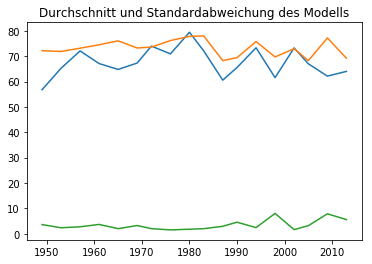

In [53]:
log_score_list = [[72.15, 3.59],
[71.85, 2.33],
[73.13, 2.72],
[74.48, 3.65],
[76.03, 1.99],
[73.21, 3.22],
[73.58, 1.99],
[76.14, 1.49],
[77.79, 1.76],
[77.96, 1.98],
[68.24, 2.91],
[69.4, 4.54],
[75.76, 2.4],
[69.68, 8.0],
[72.93, 1.61],
[68.23, 3.17],
[77.17, 7.84],[69.18, 5.57]]

means = []
stds = []
for e in log_score_list:
    means.append(e[0])
    stds.append(e[1])

#Blau
plt.plot(timeline[:18], surv_rate_lst)
#Orange
plt.plot(timeline[:18], means)
#Grün
plt.plot(timeline[:18], stds)
plt.title('Durchschnitt und Standardabweichung des Modells')
plt.show()

## Modell bei ungesehenen Daten

In [54]:
acc_score = []

for i in list(range(0,17)):
    df = df_wp_list[i]
    df2 = df_wp_list[i+1]
    wpnum = "WP" + str(int(i+2))
    wpnum2 = "WP" + str(int(i+3))
    X_train, y_train, X_test, y_test = df.loc[:, df.columns != wpnum], df[wpnum], df2.loc[:, df2.columns != wpnum2], df2[wpnum2]  
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    acc_score.append(round(accuracy_score(y_test, y_pred)*100,2))

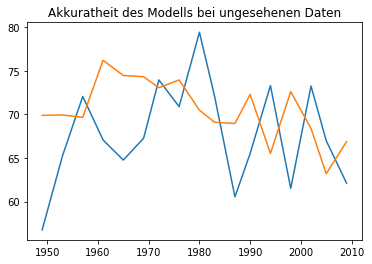

In [55]:
surv_rate_lst.pop()

#Blau
plt.plot(timeline[:17], surv_rate_lst)
#Orange
plt.plot(timeline[:17], acc_score)
plt.title('Akkuratheit des Modells bei ungesehenen Daten')
plt.show()

## Unsere Vorhersage

In [56]:
X_train, y_train, X_test = df_wp_list[17].loc[:, df_wp_list[17].columns != "WP19"], df_wp_list[17].loc[:,"WP19"], df_wp_list[18]  
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [63]:
prediction = IDs.loc[IDs["ANFANG"] == 2017, ["VORNAME", "NACHNAME"]]
prediction["WP20"] = y_pred
prediction.index = list(range(0,711))

In [65]:
prediction

,VORNAME,NACHNAME,WP20
0,Peter,Bleser,0
1,Jörg-Diether,Dehm-Desoi,0
2,Hans-Joachim,Fuchtel,0
3,Gregor,Gysi,1
4,Ulla,Jelpke,0
5,Volker,Kauder,0
6,Wolfgang,Kubicki,0
7,Katharina,Landgraf,0
8,Christoph,Matschie,0
9,Angela,Merkel,0
